<a href="https://colab.research.google.com/github/dbeniteze/clasificacion_MNIST/blob/master/4Conv_elu_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install keras==2.3.1

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [0]:
# Larger CNN for the MNIST Dataset
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Reshape
from keras.layers import Flatten, BatchNormalization
from keras.layers import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)



In [0]:
# define model
model = Sequential()
LF=(5,5) # longitud del filtro
model.add( Reshape((28,28,1), input_shape=(28,28,1)) )
model.add( Conv2D(8, LF, strides=1, padding='same') )
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add( Conv2D(16, LF, strides=1, padding='same' ))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4)) 
model.add( Conv2D(32, LF, strides=1, padding='same' ))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D()) 
model.add(Dropout(0.4))
model.add( Conv2D(64, LF, strides=1, padding='same' ))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D()) 
model.add(Dropout(0.4)) 
model.add(Flatten())
model.add(BatchNormalization())
model.add( Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add( Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add( Dense(32))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add( Dense(10,activation='softmax') )
  
  
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
model.summary()

In [0]:
# define model
model = Sequential()
LF=(5,5) # longitud del filtro
model.add( Reshape((28,28,1), input_shape=(28,28,1)) )
model.add( Conv2D(32, LF, strides=1, padding='same', activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add( Conv2D(32, LF, strides=1, padding='same', activation='elu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D()) 
model.add(Dropout(0.05))
model.add( Conv2D(64, LF, strides=1, padding='same', activation='elu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D()) 
model.add(Dropout(0.05))
model.add( Conv2D(128, LF, strides=1, padding='same', activation='elu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D())  
model.add(Dropout(0.05))
model.add(Flatten())
model.add(BatchNormalization())
model.add( Dense(128, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add( Dense(64, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add( Dense(32, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add( Dense(10,activation='softmax') )

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_18 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)       

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 17s 281us/step - loss: 0.1147 - accuracy: 0.9688 - val_loss: 0.0392 - val_accuracy: 0.9877
Epoch 2/50
60000/60000 [==============================] - 15s 258us/step - loss: 0.0476 - accuracy: 0.9857 - val_loss: 0.0368 - val_accuracy: 0.9890
Epoch 3/50
60000/60000 [==============================] - 15s 256us/step - loss: 0.0335 - accuracy: 0.9900 - val_loss: 0.0362 - val_accuracy: 0.9881
Epoch 4/50
60000/60000 [==============================] - 15s 257us/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0313 - val_accuracy: 0.9896
Epoch 5/50
60000/60000 [==============================] - 15s 253us/step - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0404 - val_accuracy: 0.9865
Epoch 6/50
60000/60000 [==============================] - 15s 257us/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0271 - val_accuracy: 0.9924
Epoch 7/50
60000/60000 [==============================] 

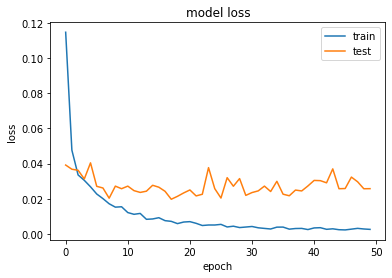

Error: 0.49%


In [0]:

# Fit the model
modelo = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)


plt.plot(modelo.history['loss'])
plt.plot(modelo.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

print("Error: %.2f%%" % (100-scores[1]*100))